In [2]:
import dvc.api
import numpy as np
import torch
from torch.utils.data import DataLoader
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

from data_loader import MAPDataset
from preprocess import read_load_trace_data, preprocessing

params = dvc.api.params_show("../params.yaml")
hardware = params["hardware"]
batch_size = params["trace-data"]["batch-size"]
train_data, eval_data = read_load_trace_data("/home/neel/Desktop/LoadTraces/spec06/473.astar-s0.txt.xz", 20, 30, 1)

df_train = preprocessing(train_data, hardware)
df_test = preprocessing(eval_data, hardware)

df_test["hit"] = df_test["hit"].astype(np.float32)
df_train["hit"] = df_train["hit"].astype(np.float32)

# Choose the fields to cluster the data by
data_test = df_test[['block_address', 'page_address', 'page_offset', 'block_index']]
data_train = df_train[['block_address', 'page_address', 'page_offset', 'block_index']]



# train_dataset = MAPDataset(df_train)
# test_dataset = MAPDataset(df_test)

# train_loader = DataLoader(train_dataset,batch_size=batch_size,shuffle=True,collate_fn=train_dataset.collate_fn)
# test_loader = DataLoader(test_dataset,batch_size=batch_size,shuffle=False,collate_fn=test_dataset.collate_fn)



{'system': {'gpu-id': 0, 'traces': '../data', 'processed': 'processed', 'model': 'model'}, 'teacher': {'number': 1, 'model': 'd'}, 'student': {'model': 'd'}, 'train': {'epochs': 50, 'lr': 0.0002, 'gamma': 0.1, 'step-size': 20, 'early-stop': 10, 'alpha': 0.5, 'temperature': 5}, 'model': {'tch_d': {'channels': 1}, 'tch_r': {'dim': 64, 'channels': 1}, 'tch_v': {'dim': 256, 'depth': 8, 'heads': 10, 'mlp-dim': 256, 'channels': 1}, 'stu_d': {'channels': 1}, 'stu_r': {'dim': 4, 'channels': 1}, 'stu_v': {'dim': 16, 'depth': 2, 'heads': 2, 'mlp-dim': 16, 'channels': 1}}, 'apps': {'app': '473.astar-s1.txt.xz'}, 'trace-data': {'train': 20, 'total': 30, 'skip': 0, 'batch-size': 256}, 'hardware': {'block-bits': 6, 'total-bits': 64, 'look-back': 9, 'pred-forward': 128, 'page-bits': 12, 'delta-bound': 128, 'split-bits': 6, 'filter-size': 16, 'bitmap-size': 256, 'block-num-bits': 58}, '../../num_tch_2/d.yaml:system.traces': '../data', '../../num_tch_2/d.yaml:apps.app': '473.astar-s0.txt.xz', '../../nu

Maximum memory limit (soft limit): -1 bytes
Maximum memory limit (soft limit): -9.5367431640625e-07 MB


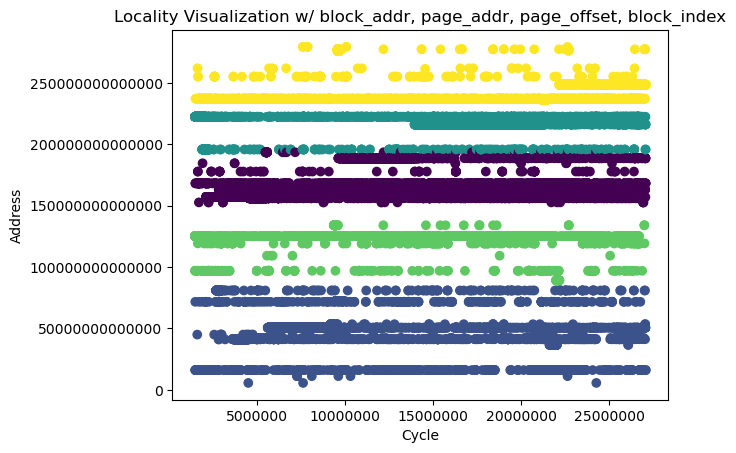

In [3]:
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0, n_init=10)
 
# df_test["cluster"] = kmeans.fit_predict(data_test) 
df_train['cluster'] = kmeans.fit_predict(data_train)

plt.scatter(df_train['cycle'], df_train['addr'], c=df_train['cluster'])
    
plt.xlabel('Cycle')
plt.ylabel('Address')
plt.title('Locality Visualization w/ block_addr, page_addr, page_offset, block_index')

plt.ticklabel_format(style='plain')
plt.show()

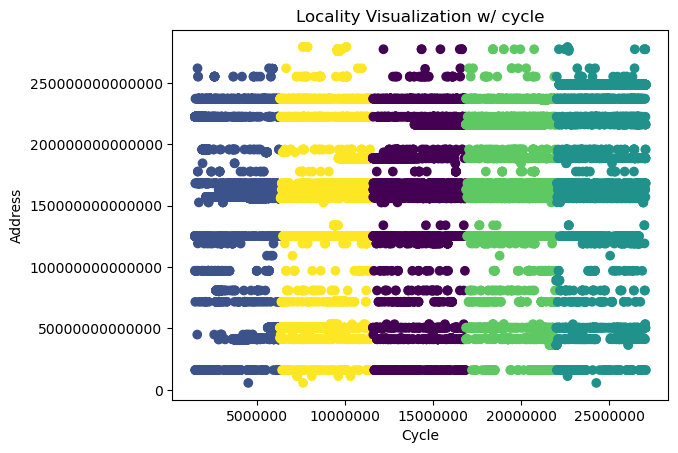

In [4]:
# Select different data to cluster by
data_train = df_train[['cycle']]

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0, n_init=10)
df_train['cluster'] = kmeans.fit_predict(data_train)

plt.scatter(df_train['cycle'], df_train['addr'], c=df_train['cluster'])
    
plt.xlabel('Cycle')
plt.ylabel('Address')
plt.title('Locality Visualization w/ cycle')

plt.ticklabel_format(style='plain')
plt.show()


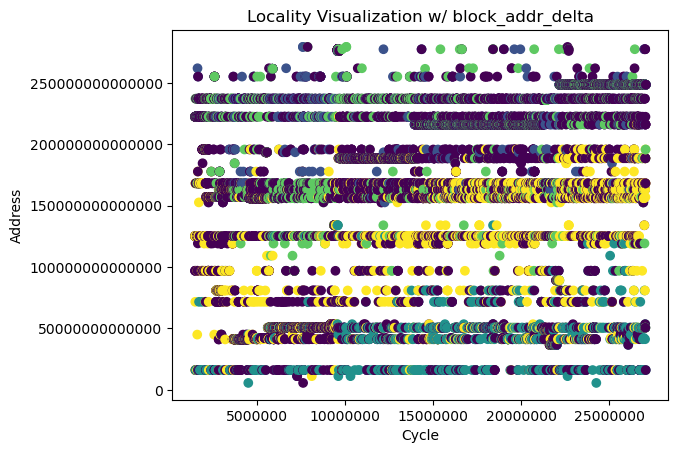

In [5]:
# Select different data to cluster by
data_train = df_train[['block_addr_delta']]

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0, n_init=10)
df_train['cluster'] = kmeans.fit_predict(data_train)

plt.scatter(df_train['cycle'], df_train['addr'], c=df_train['cluster'])
    
plt.xlabel('Cycle')
plt.ylabel('Address')
plt.title('Locality Visualization w/ block_addr_delta')

plt.ticklabel_format(style='plain')
plt.show()


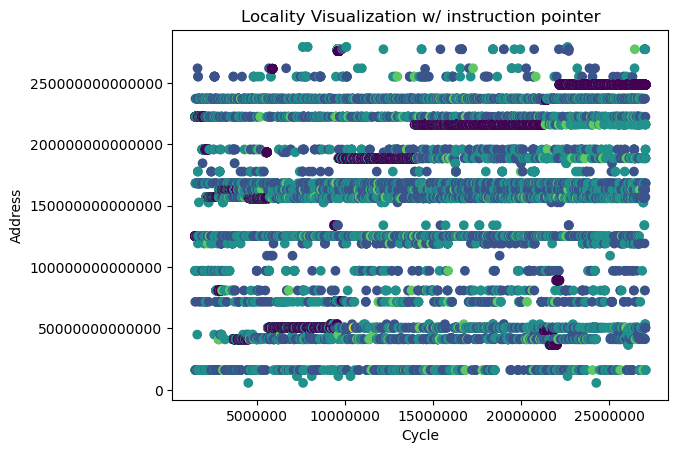

In [6]:
# Select different data to cluster by
data_train = df_train[['ip']]

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0, n_init=10)
df_train['cluster'] = kmeans.fit_predict(data_train)

plt.scatter(df_train['cycle'], df_train['addr'], c=df_train['cluster'])
    
plt.xlabel('Cycle')
plt.ylabel('Address')
plt.title('Locality Visualization w/ instruction pointer')

plt.ticklabel_format(style='plain')
plt.show()

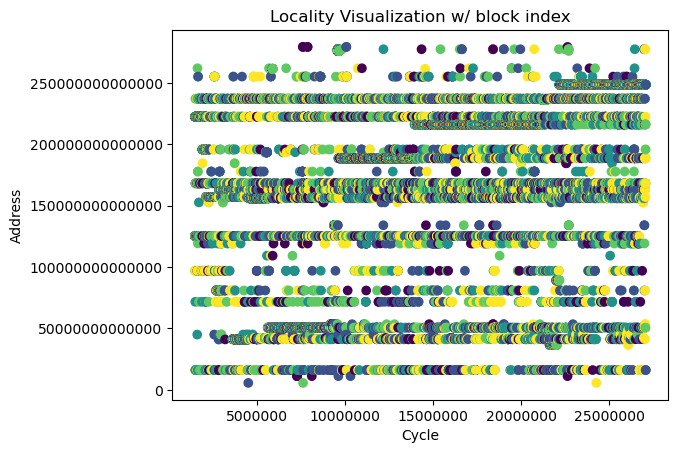

In [7]:
# Select different data to cluster by
data_train = df_train[['block_index']]
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0, n_init=10)
df_train['cluster'] = kmeans.fit_predict(data_train)

plt.scatter(df_train['cycle'], df_train['addr'], c=df_train['cluster'])
    
plt.xlabel('Cycle')
plt.ylabel('Address')
plt.title('Locality Visualization w/ block index')

plt.ticklabel_format(style='plain')
plt.show()

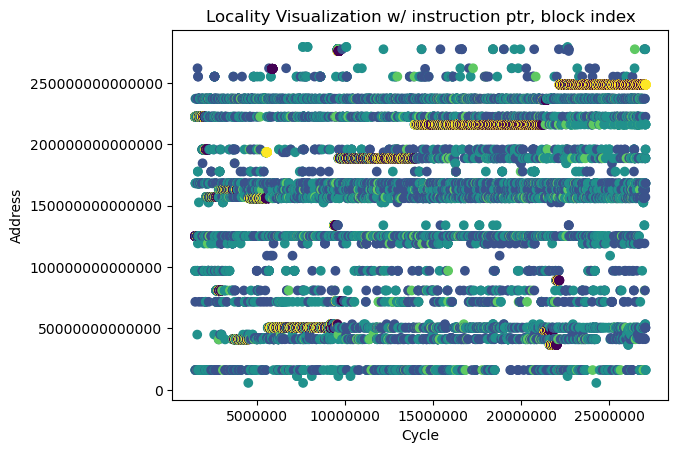

In [8]:
# Select different data to cluster by
data_train = df_train[['ip','block_index']]
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0, n_init=10)
df_train['cluster'] = kmeans.fit_predict(data_train)

plt.scatter(df_train['cycle'], df_train['addr'], c=df_train['cluster'])
    
plt.xlabel('Cycle')
plt.ylabel('Address')
plt.title('Locality Visualization w/ instruction ptr, block index')

plt.ticklabel_format(style='plain')
plt.show()

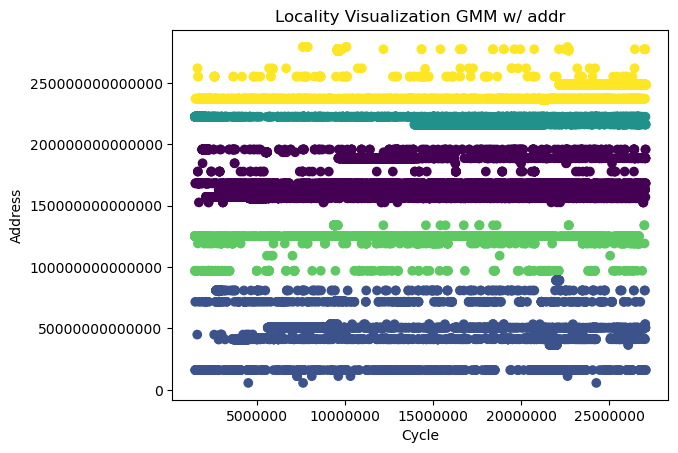

In [9]:
from sklearn.mixture import GaussianMixture

# Select the data to cluster by
data_train = df_train[['addr']]

# Create a Gaussian Mixture Model object with the desired number of clusters
n_clusters = 5
gmm = GaussianMixture(n_components=n_clusters, random_state=0)

# Fit the GMM model to your data
gmm.fit(data_train)

# Predict the cluster labels for each sample
clusters = gmm.predict(data_train)

# Plot the clusters
plt.scatter(df_train['cycle'], df_train['addr'], c=clusters)
plt.xlabel('Cycle')
plt.ylabel('Address')
plt.title('Locality Visualization GMM w/ addr')

plt.ticklabel_format(style='plain')
plt.show()

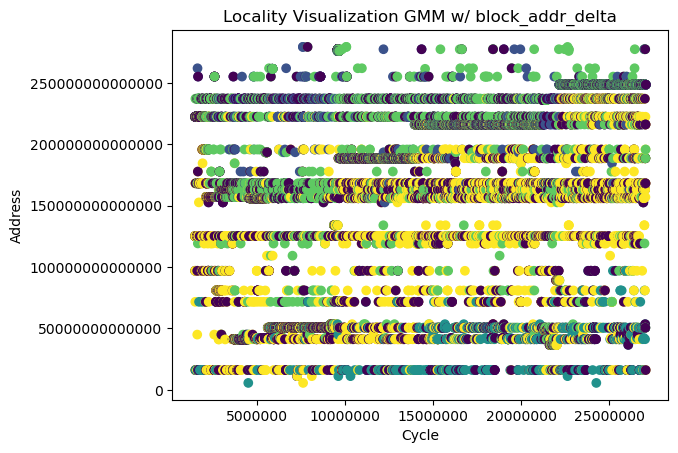

In [10]:
# Select the data to cluster by
data_train = df_train[['block_addr_delta']]

# Create a Gaussian Mixture Model object with the desired number of clusters
n_clusters = 5
gmm = GaussianMixture(n_components=n_clusters, random_state=0)

# Fit the GMM model to your data
gmm.fit(data_train)

# Predict the cluster labels for each sample
clusters = gmm.predict(data_train)

# Plot the clusters
plt.scatter(df_train['cycle'], df_train['addr'], c=clusters)
plt.xlabel('Cycle')
plt.ylabel('Address')
plt.title('Locality Visualization GMM w/ block_addr_delta')

plt.ticklabel_format(style='plain')
plt.show()

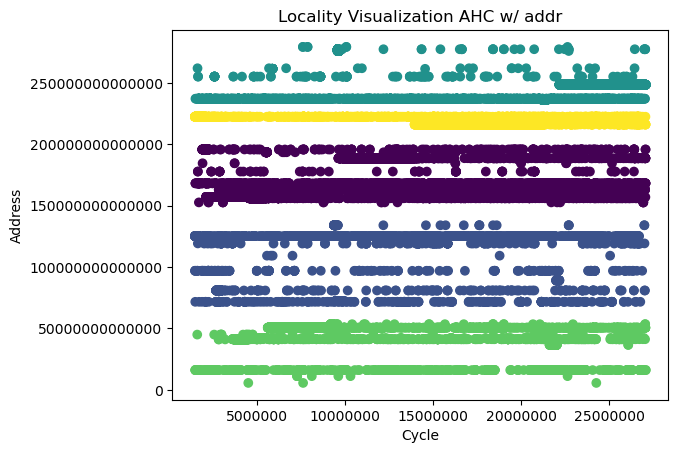

In [11]:
from sklearn.cluster import AgglomerativeClustering

# Select the data to cluster by
data_train = df_train[['addr']]

# Create an AgglomerativeClustering object with the desired number of clusters
n_clusters = 5
ahc = AgglomerativeClustering(n_clusters=n_clusters)

# Fit the AHC model to your data
ahc.fit(data_train)

# Predict the cluster labels for each sample
clusters = ahc.labels_

# Plot the clusters
plt.scatter(df_train['cycle'], df_train['addr'], c=clusters)
plt.xlabel('Cycle')
plt.ylabel('Address')
plt.title('Locality Visualization AHC w/ addr')

plt.ticklabel_format(style='plain')
plt.show()

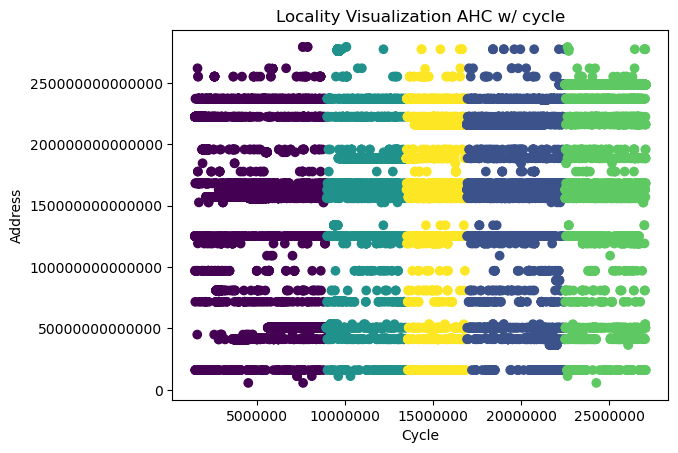

In [12]:
# Select the data to cluster by
data_train = df_train[['cycle']]

# Create an AgglomerativeClustering object with the desired number of clusters
n_clusters = 5
ahc = AgglomerativeClustering(n_clusters=n_clusters)

# Fit the AHC model to your data
ahc.fit(data_train)

# Predict the cluster labels for each sample
clusters = ahc.labels_

# Plot the clusters
plt.scatter(df_train['cycle'], df_train['addr'], c=clusters)
plt.xlabel('Cycle')
plt.ylabel('Address')
plt.title('Locality Visualization AHC w/ cycle')

plt.ticklabel_format(style='plain')
plt.show()

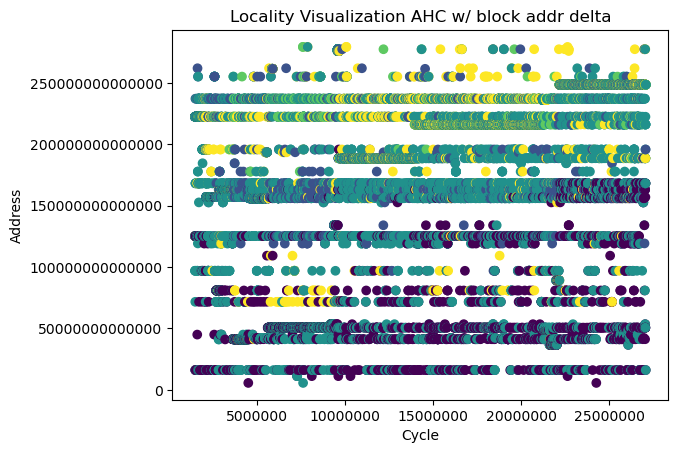

In [13]:
# Select the data to cluster by
data_train = df_train[['block_addr_delta']]

# Create an AgglomerativeClustering object with the desired number of clusters
n_clusters = 5
ahc = AgglomerativeClustering(n_clusters=n_clusters)

# Fit the AHC model to your data
ahc.fit(data_train)

# Predict the cluster labels for each sample
clusters = ahc.labels_

# Plot the clusters
plt.scatter(df_train['cycle'], df_train['addr'], c=clusters)
plt.xlabel('Cycle')
plt.ylabel('Address')
plt.title('Locality Visualization AHC w/ block addr delta')

plt.ticklabel_format(style='plain')
plt.show()

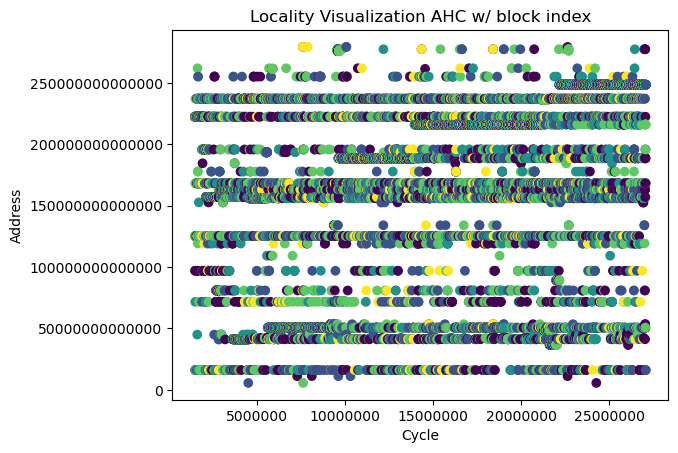

In [14]:
# Select the data to cluster by
data_train = df_train[['block_index']]

# Create an AgglomerativeClustering object with the desired number of clusters
n_clusters = 5
ahc = AgglomerativeClustering(n_clusters=n_clusters)

# Fit the AHC model to your data
ahc.fit(data_train)

# Predict the cluster labels for each sample
clusters = ahc.labels_

# Plot the clusters
plt.scatter(df_train['cycle'], df_train['addr'], c=clusters)
plt.xlabel('Cycle')
plt.ylabel('Address')
plt.title('Locality Visualization AHC w/ block index')

plt.ticklabel_format(style='plain')
plt.show()

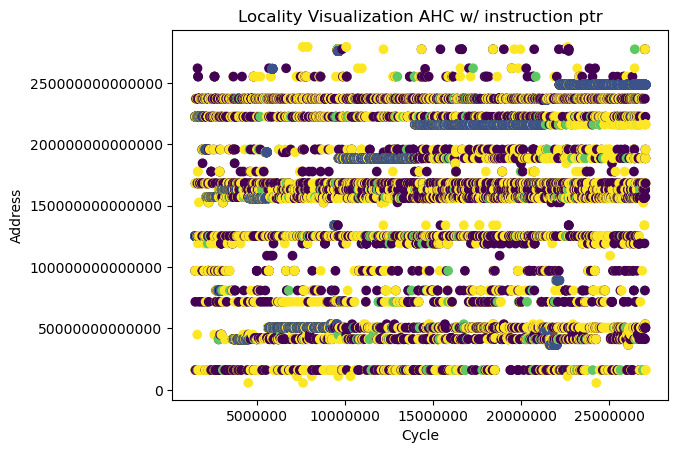

In [15]:
# Select the data to cluster by
data_train = df_train[['ip']]

# Create an AgglomerativeClustering object with the desired number of clusters
n_clusters = 5
ahc = AgglomerativeClustering(n_clusters=n_clusters)

# Fit the AHC model to your data
ahc.fit(data_train)

# Predict the cluster labels for each sample
clusters = ahc.labels_

# Plot the clusters
plt.scatter(df_train['cycle'], df_train['addr'], c=clusters)
plt.xlabel('Cycle')
plt.ylabel('Address')
plt.title('Locality Visualization AHC w/ instruction ptr')

plt.ticklabel_format(style='plain')
plt.show()

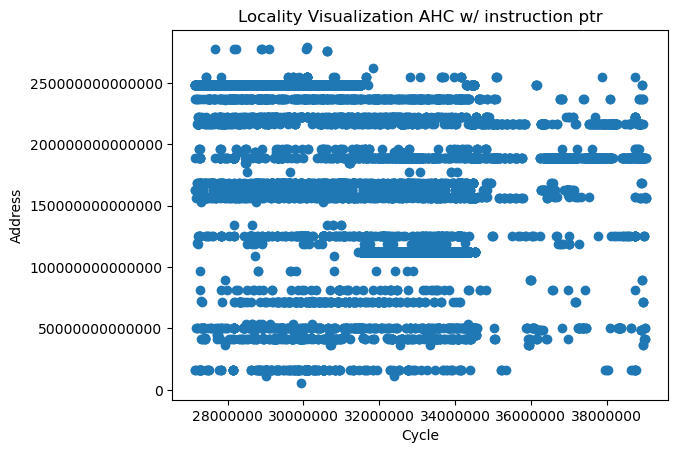

In [16]:
data_test = df_test[['block_addr_delta']]

plt.scatter(df_test['cycle'], df_test['addr'])
plt.xlabel('Cycle')
plt.ylabel('Address')
plt.title('Locality Visualization AHC w/ instruction ptr')

plt.ticklabel_format(style='plain')
plt.show()

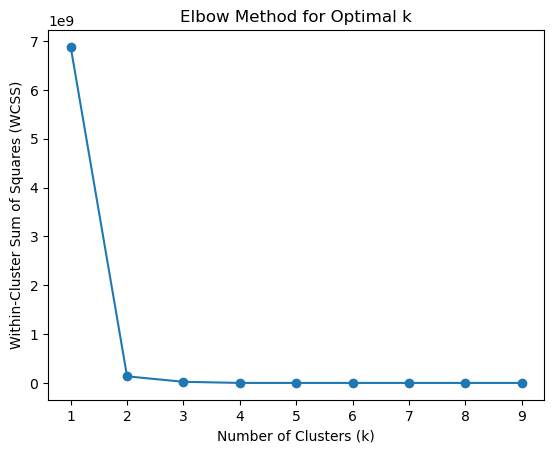

In [17]:
inertia = []
k_values = range(1, 10)  # Vary the range according to your needs

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0, n_init=10)
    kmeans.fit(data_train)
    inertia.append(kmeans.inertia_)

# Plot the WCSS values
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

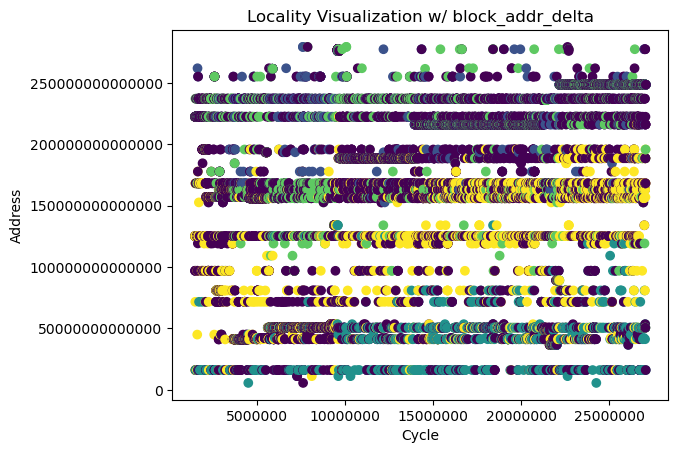

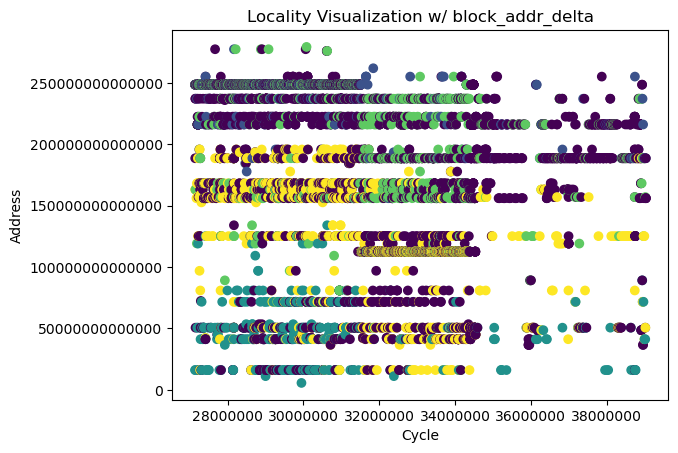

In [20]:
# Select different data to cluster by
data_train = df_train[['block_addr_delta']]
data_test = df_test[['block_addr_delta']]

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0, n_init=10)
df_train['cluster'] = kmeans.fit_predict(data_train)
df_test['cluster'] = kmeans.predict(data_test)

plt.scatter(df_train['cycle'], df_train['addr'], c=df_train['cluster'])
    
plt.xlabel('Cycle')
plt.ylabel('Address')
plt.title('Locality Visualization w/ block_addr_delta')

plt.ticklabel_format(style='plain')
plt.show()

plt.scatter(df_test['cycle'], df_test['addr'], c=df_test['cluster'])
    
plt.xlabel('Cycle')
plt.ylabel('Address')
plt.title('Locality Visualization w/ block_addr_delta')

plt.ticklabel_format(style='plain')
plt.show()

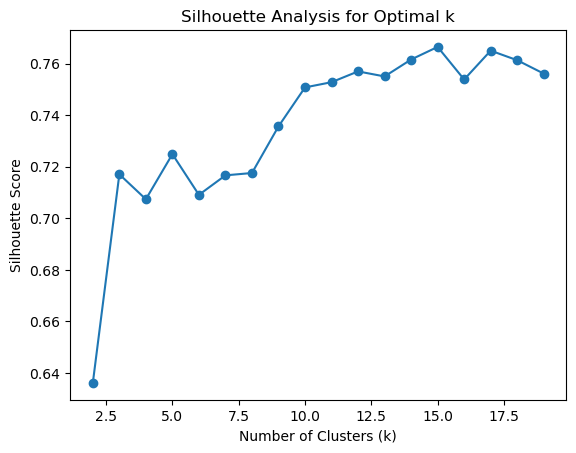

In [19]:
from sklearn.metrics import silhouette_score, silhouette_samples

silhouette_scores = []
k_values = range(2, 20)  # Vary the range according to your needs

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data_train)
    silhouette_avg = silhouette_score(data_train, labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.show()